In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def parse_file(lines):
    data = [parse_line(line, idx) for idx, line in enumerate(lines) if line.strip()]
    return pd.DataFrame(data)

In [3]:
def parse_line(line, idx):
    if line.startswith("Iteration"):
        parts = line.split(":")
        iteration = int(parts[1].replace(" ", ""))
        time = int(parts[2].split(" ")[1])
        
        return {
            'iteration': iteration,
            'time': time
        }
    
    parts = line.split(":")
    service = parts[0].strip()
    metrics = parts[1].split("|")
    
    cpu = float(metrics[0].split(" ")[2].replace("%", ""))
    
    mem_used = metrics[1].split(" ")[2]
    mem_total = metrics[1].split(" ")[4]
    net_used = metrics[2].split(" ")[2]
    net_total = metrics[2].split(" ")[4]
    block = metrics[3].split(" ")[2]
    
    mem_used_bytes = convert_to_bytes(mem_used)
    mem_total_bytes = convert_to_bytes(mem_total)
    net_used_bytes = convert_to_bytes(net_used)
    net_total_bytes = convert_to_bytes(net_total)
    block_bytes = convert_to_bytes(block)
    
    mem_used_mb = mem_used_bytes / (1000 * 1000)
    mem_total_mb = mem_total_bytes / (1000 * 1000)
    
    return {
        'unit': idx,
        'service': service,
        'cpu': cpu,
        'mem_used': mem_used_mb,
        'mem_total': mem_total_mb,
        'net_used': net_used_bytes,
        'net_total': net_total_bytes,
        'block_used': net_used_bytes,
        'block_total': block_bytes
    }

In [4]:
def convert_to_bytes(value: str) -> int:
    units = {
        'B': 1,
        'kB': 1000,
        'MB': 1000 * 1000,
        'MiB': 1024 * 1024,
        'GB': 1000 * 1000 * 1000,
        'GiB': 1024 * 1024 * 1024,
        'KiB': 1024,
    }
    match = re.match(r"([\d.]+)([A-Za-z]+)", value.strip())
    if match:
        number = float(match.group(1))
        unit = match.group(2)
        return int(number * units[unit])
    return 0

In [5]:
def calculate_aggregates(df):
    grouped = df.groupby('service')

    aggregates = []

    for service, group in grouped:
        max_cpu = group['cpu'].max()
        max_mem = group['mem_used'].max()
        avg_cpu = group['cpu'].mean()
        avg_mem = group['mem_used'].mean()
        avg_net = group['net_used'].mean()
        avg_block = group['block_used'].mean()

        aggregates.append({
            'Service': service,
            'Avg CPU (%)': avg_cpu,
            'Max CPU (%)': max_cpu,
            'Avg Mem (MB)': avg_mem,
            'Max Mem (MB)': max_mem,
            'Avg Net (kB)': avg_net,
            'Avg Block (B)': avg_block
        })

    return pd.DataFrame(aggregates)

In [6]:
def print_time_results(df):
    iteration_rows = df[df['iteration'].notnull()]
    
    if iteration_rows.empty:
        print("No iteration data found.")
        return

    iteration_times = iteration_rows['time'].tolist()
    avg_time = sum(iteration_times) / len(iteration_times)

    headers = [f"Iteration {i}" for i in range(1, len(iteration_times) + 1)] + ["Average"]
    values = iteration_times + [f"{avg_time:.2f}"]

    col_width = max(len(header) for header in headers) + 2
    formatted_headers = " | ".join(header.ljust(col_width) for header in headers)
    formatted_values = " | ".join(str(value).ljust(col_width) for value in values)

    print(formatted_headers)
    print(formatted_values)

In [7]:
def plot_metrics_over_time(df):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['cpu'], label=service)
    plt.title('CPU Usage (%) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('CPU (%)')
    plt.legend()

    plt.subplot(2, 2, 2)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['mem_used'], label=service)
    plt.title('Memory Usage (MB) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Memory (MB)')
    plt.legend()

    plt.subplot(2, 2, 3)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['net_used'], label=service)
    plt.title('Network Usage (kB) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Network (kB)')
    plt.legend()

    plt.subplot(2, 2, 4)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['block_used'], label=service)
    plt.title('Block Usage (B) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Block (B)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
# TODO: Change this to the directory where the results are stored
results_dir = "final"

In [9]:
preprocessing = "preprocessing"
_import = "import"
largestNumberOfChildren = "largestNumberOfChildren"
neighborhoodPopularity = "neighborhoodPopularity"
shortestPathPopularity = "shortestPathPopularity"
directPathWithHighPopularity = "directPathWithHighPopularity"

In [10]:
# TODO: Add the files you want to analyze
files = [_import, largestNumberOfChildren, neighborhoodPopularity, shortestPathPopularity, directPathWithHighPopularity]
files = [f"{results_dir}/{file}" for file in files]

Metrics for final/import

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     0.000000         0.00      0.393216      0.393216   1592.994012    1592.994012
adv-db-systems.importer    59.938174       290.84   1756.554319   2455.647551   3479.910180    3479.910180
adv-db-systems.memgraph    45.384222        98.57    831.552589   1924.145348   2777.904192    2777.904192

Iteration 1   | Average      
65009.0       | 65009.00     


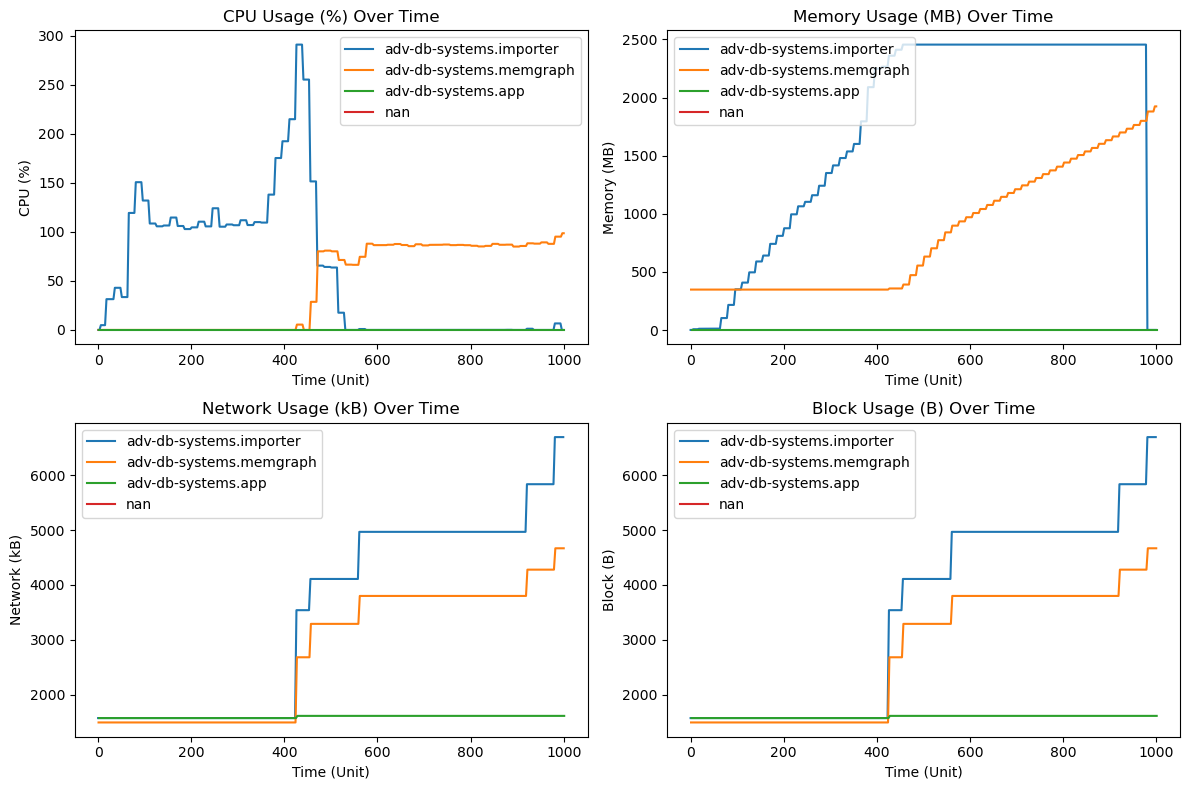

Metrics for final/largestNumberOfChildren

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     7.621127         28.5      8.873522     17.228103   6918.591549    6918.591549
adv-db-systems.importer     0.000000          0.0      1.668302      1.720713   6739.154930    6739.154930
adv-db-systems.memgraph    57.851408         98.9   2399.162682   2847.563317   8066.830986    8066.830986

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
4262.0        | 3478.0        | 3430.0        | 3449.0        | 3432.0        | 3610.20      


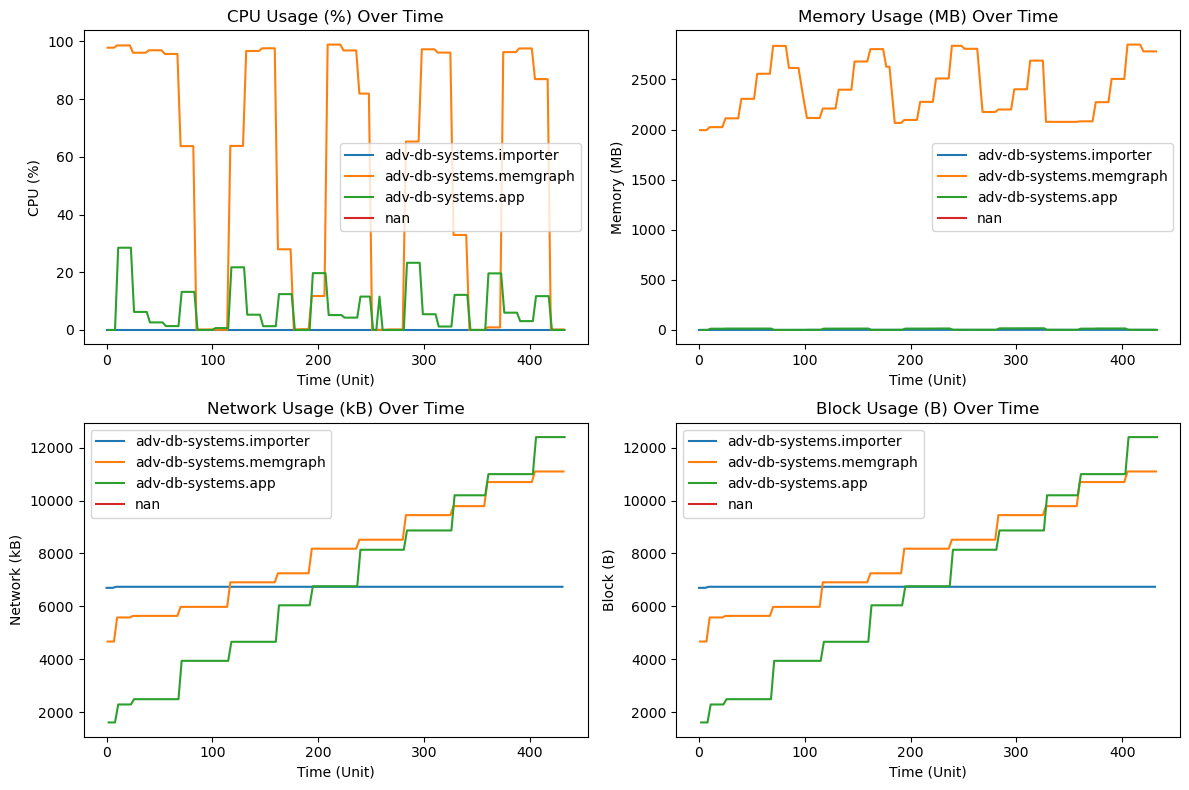

Metrics for final/neighborhoodPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app    15.042647        54.64     27.114398    188.429107  1.153505e+07   1.153505e+07
adv-db-systems.importer     0.000000         0.00      1.778199      1.794113  6.740000e+03   6.740000e+03
adv-db-systems.memgraph    50.397529        98.08   2731.744471   3482.144735  2.811765e+04   2.811765e+04

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
4758.0        | 5140.0        | 4841.0        | 4839.0        | 4799.0        | 4875.40      


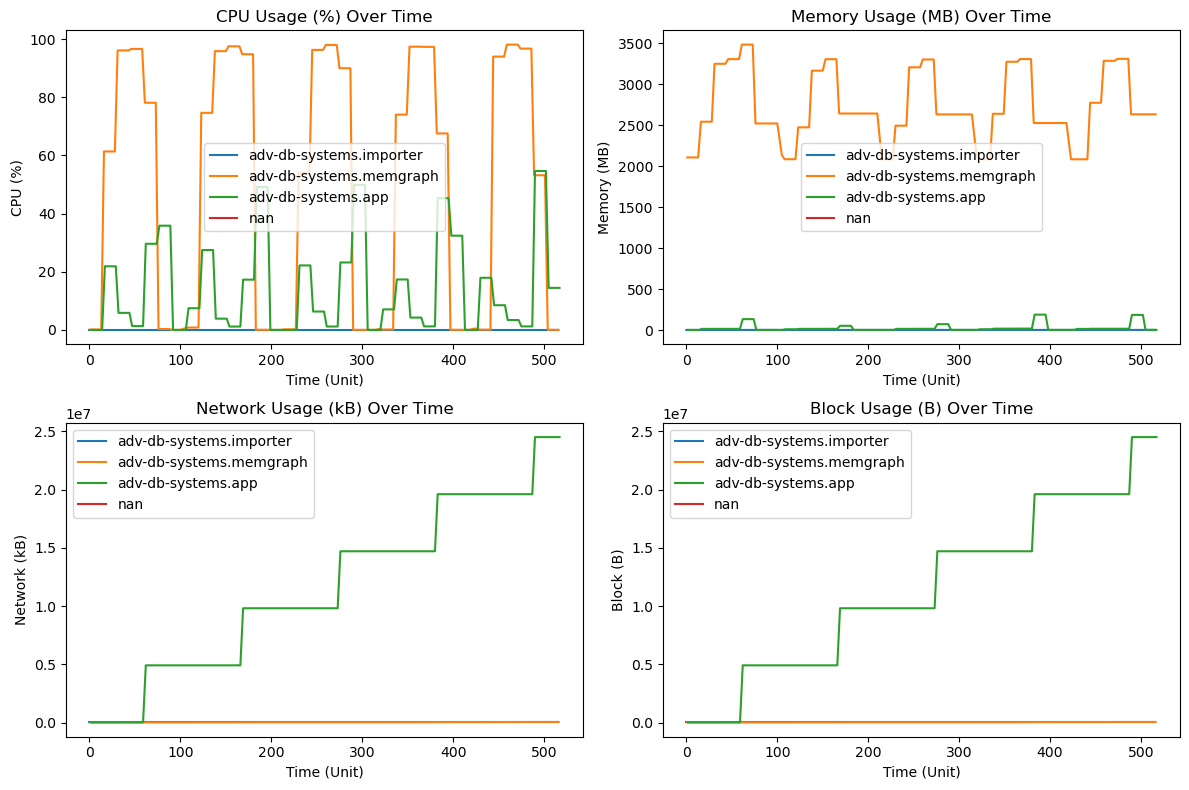

Metrics for final/shortestPathPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     2.805158        22.38     15.421732     18.853396  2.450000e+07   2.450000e+07
adv-db-systems.importer     0.000000         0.00      1.794113      1.794113  6.740000e+03   6.740000e+03
adv-db-systems.memgraph    86.215754        98.70   3465.324663   3816.078442  5.068316e+04   5.068316e+04

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
21259.0       | 20673.0       | 20798.0       | 20905.0       | 20697.0       | 20866.40     


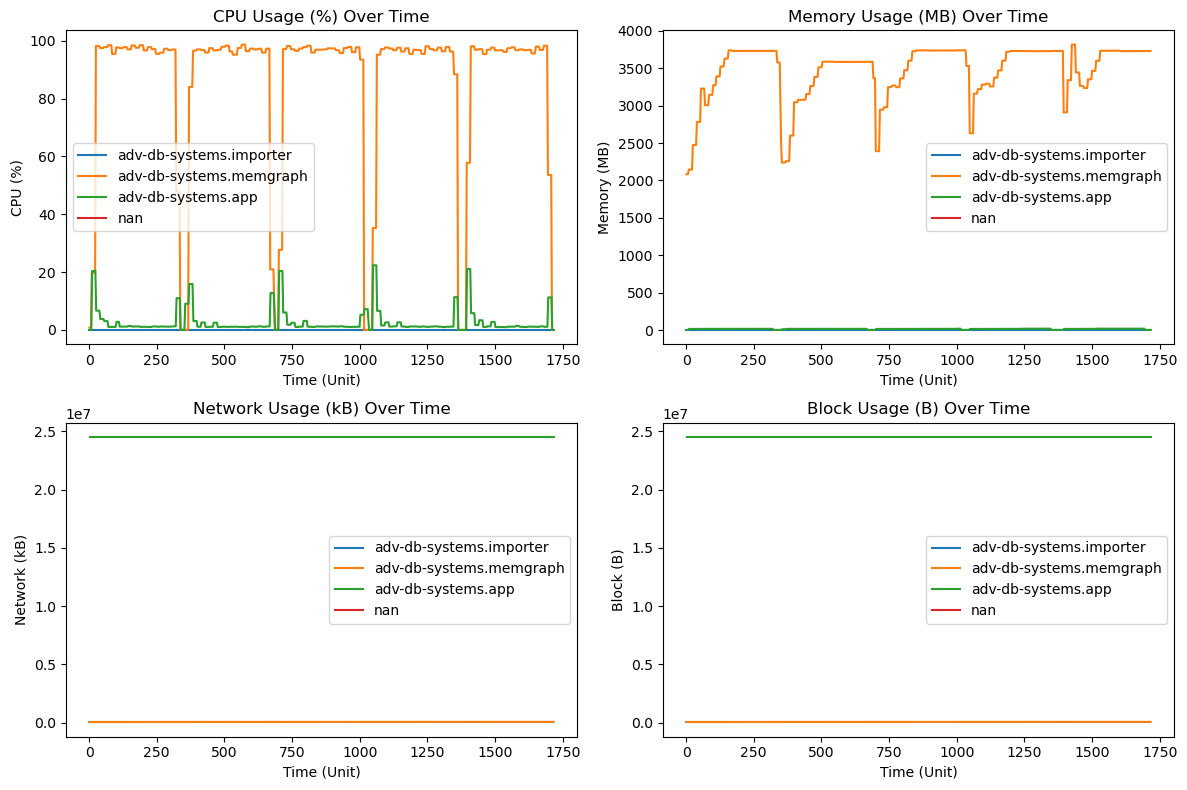

Metrics for final/directPathWithHighPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     4.155552        22.20     15.136229     18.717081  2.458405e+07   2.458405e+07
adv-db-systems.importer     0.000000         0.00      1.797381      1.798307  6.740000e+03   6.740000e+03
adv-db-systems.memgraph    77.781779        98.62   2078.981554   2086.280364  5.877239e+04   5.877239e+04

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
12014.0       | 10796.0       | 10751.0       | 10696.0       | 10891.0       | 11029.60     


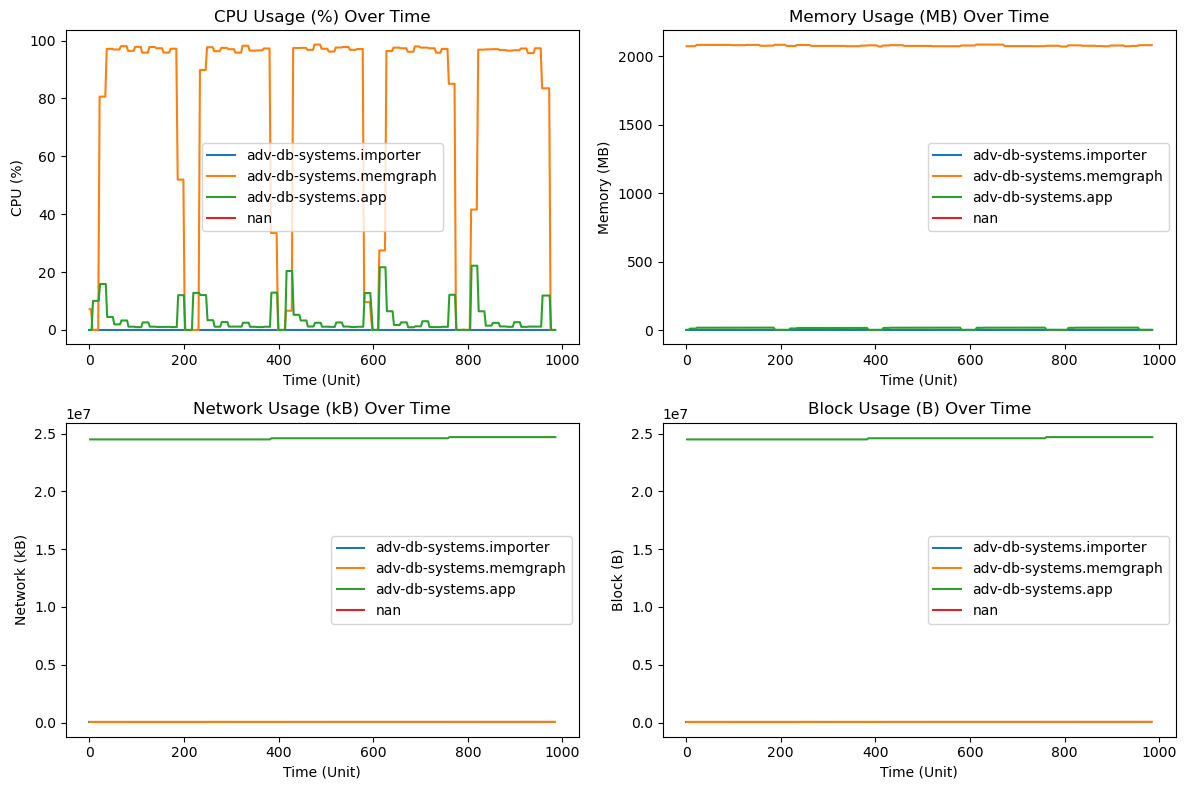

In [11]:
for file in files:
    with open(f"{file}") as f:
        lines = f.readlines()
        df = parse_file(lines)
        
        print(f"Metrics for {file}")
        print()
        
        result_df = calculate_aggregates(df)
        print(result_df.to_string(index=False))
        
        print()
        
        print_time_results(df)
        plot_metrics_over_time(df)